In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from utilities.produce_interpretable_tree import produce_interpretable_tree


In [9]:

df = pd.read_csv("outputsOfInterest300.csv", sep=",") # Read the CSV file
df = df.drop(columns=['iteration']) # Drop the iteration column
df= df.abs() # Take the absolute value of all columns

folder = "./biomass_results/"
if not os.path.exists(folder): # Create the folder if it does not exist
    os.makedirs(folder)


# Combine 'LTH', 'DH', and 'SpaceHeating' columns
df['LTH'] = df['LTH'] + df['DH'] + df['SpaceHeating']

# Drop the original 'DH' and 'SpaceHeating' columns
df = df.drop(columns=['DH', 'SpaceHeating'])

# Combine 'MTH' and 'HTH' 
df['HTH'] = df['MTH'] + df['HTH']

# Drop the original 'DH' and 'SpaceHeating' columns
df = df.drop(columns=['MTH'])


# drop columns because of too low values
df = df.drop(columns=['CHP', 'LTH', 'HTH', 'rawBiogas', 'coal'])
# df = df[:100] # Take the first 100 rows

"""
# Normalize each column
for column in df.columns:
    max_value = df[column].max()
    df[column] = df[column] / max_value
"""

# Now df contains the normalized values
print(df.head())


df.to_csv(folder+"df_input_normalized.csv",sep=";")

     crudeOil         HVC      syngas
0  339.534432  554.772833    0.381397
1  310.689575  476.935685    0.753880
2  132.519321  386.709035  150.597775
3  452.729129  496.430914    0.276884
4  316.024842  500.452044    0.307624


	oil	HVC	syngas	
2& 	1& 	0& 	0& 	\
3& 	0& 	1& 	1& 	\
4& 	1& 	2& 	0& 	\
5& 	1& 	3& 	0& 	\
6& 	0& 	4& 	1& 	\
7& 	1& 	5& 	0& 	\
8& 	2& 	4& 	1& 	\
9& 	3& 	4& 	1& 	\
10& 	2& 	5& 	2& 	\
11& 	3& 	5& 	2& 	\
12& 	4& 	4& 	3& 	\
13& 	3& 	6& 	3& 	\
14& 	3& 	7& 	3& 	\
15& 	4& 	7& 	3& 	\
16& 	7& 	5& 	3& 	\
17& 	7& 	5& 	4& 	\
18& 	7& 	7& 	3& 	\
19& 	6& 	9& 	3& 	\
20& 	8& 	8& 	3& 	\
21& 	8& 	10& 	2& 	\
22& 	8& 	7& 	6& 	\
23& 	10& 	7& 	5& 	\
24& 	9& 	11& 	3& 	\
{0: [' oil <= 253.50', ' oil >  253.50']}


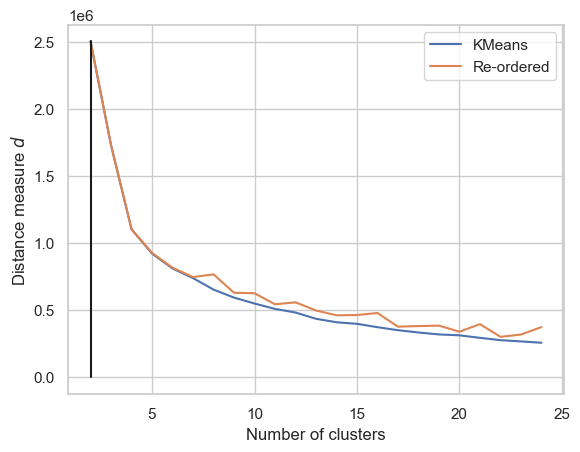

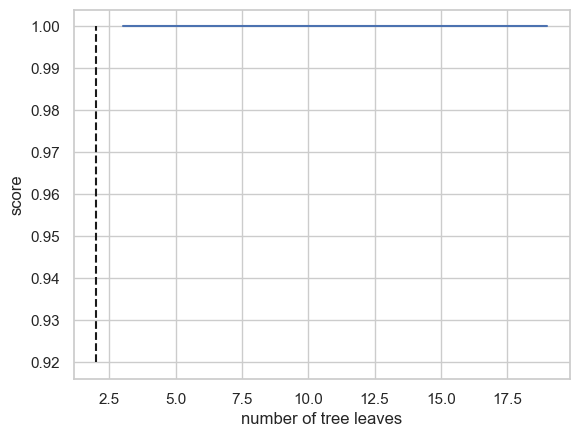

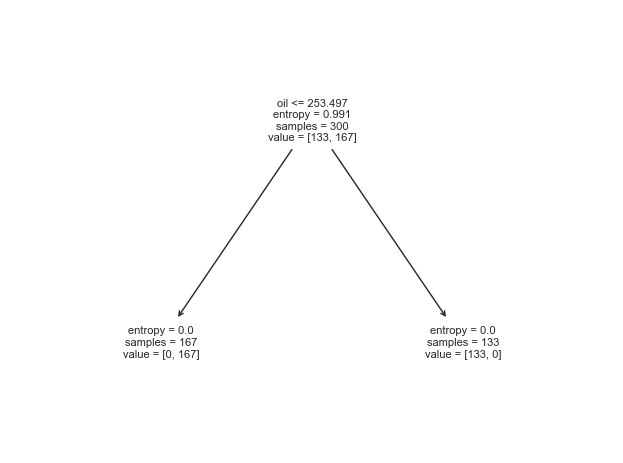

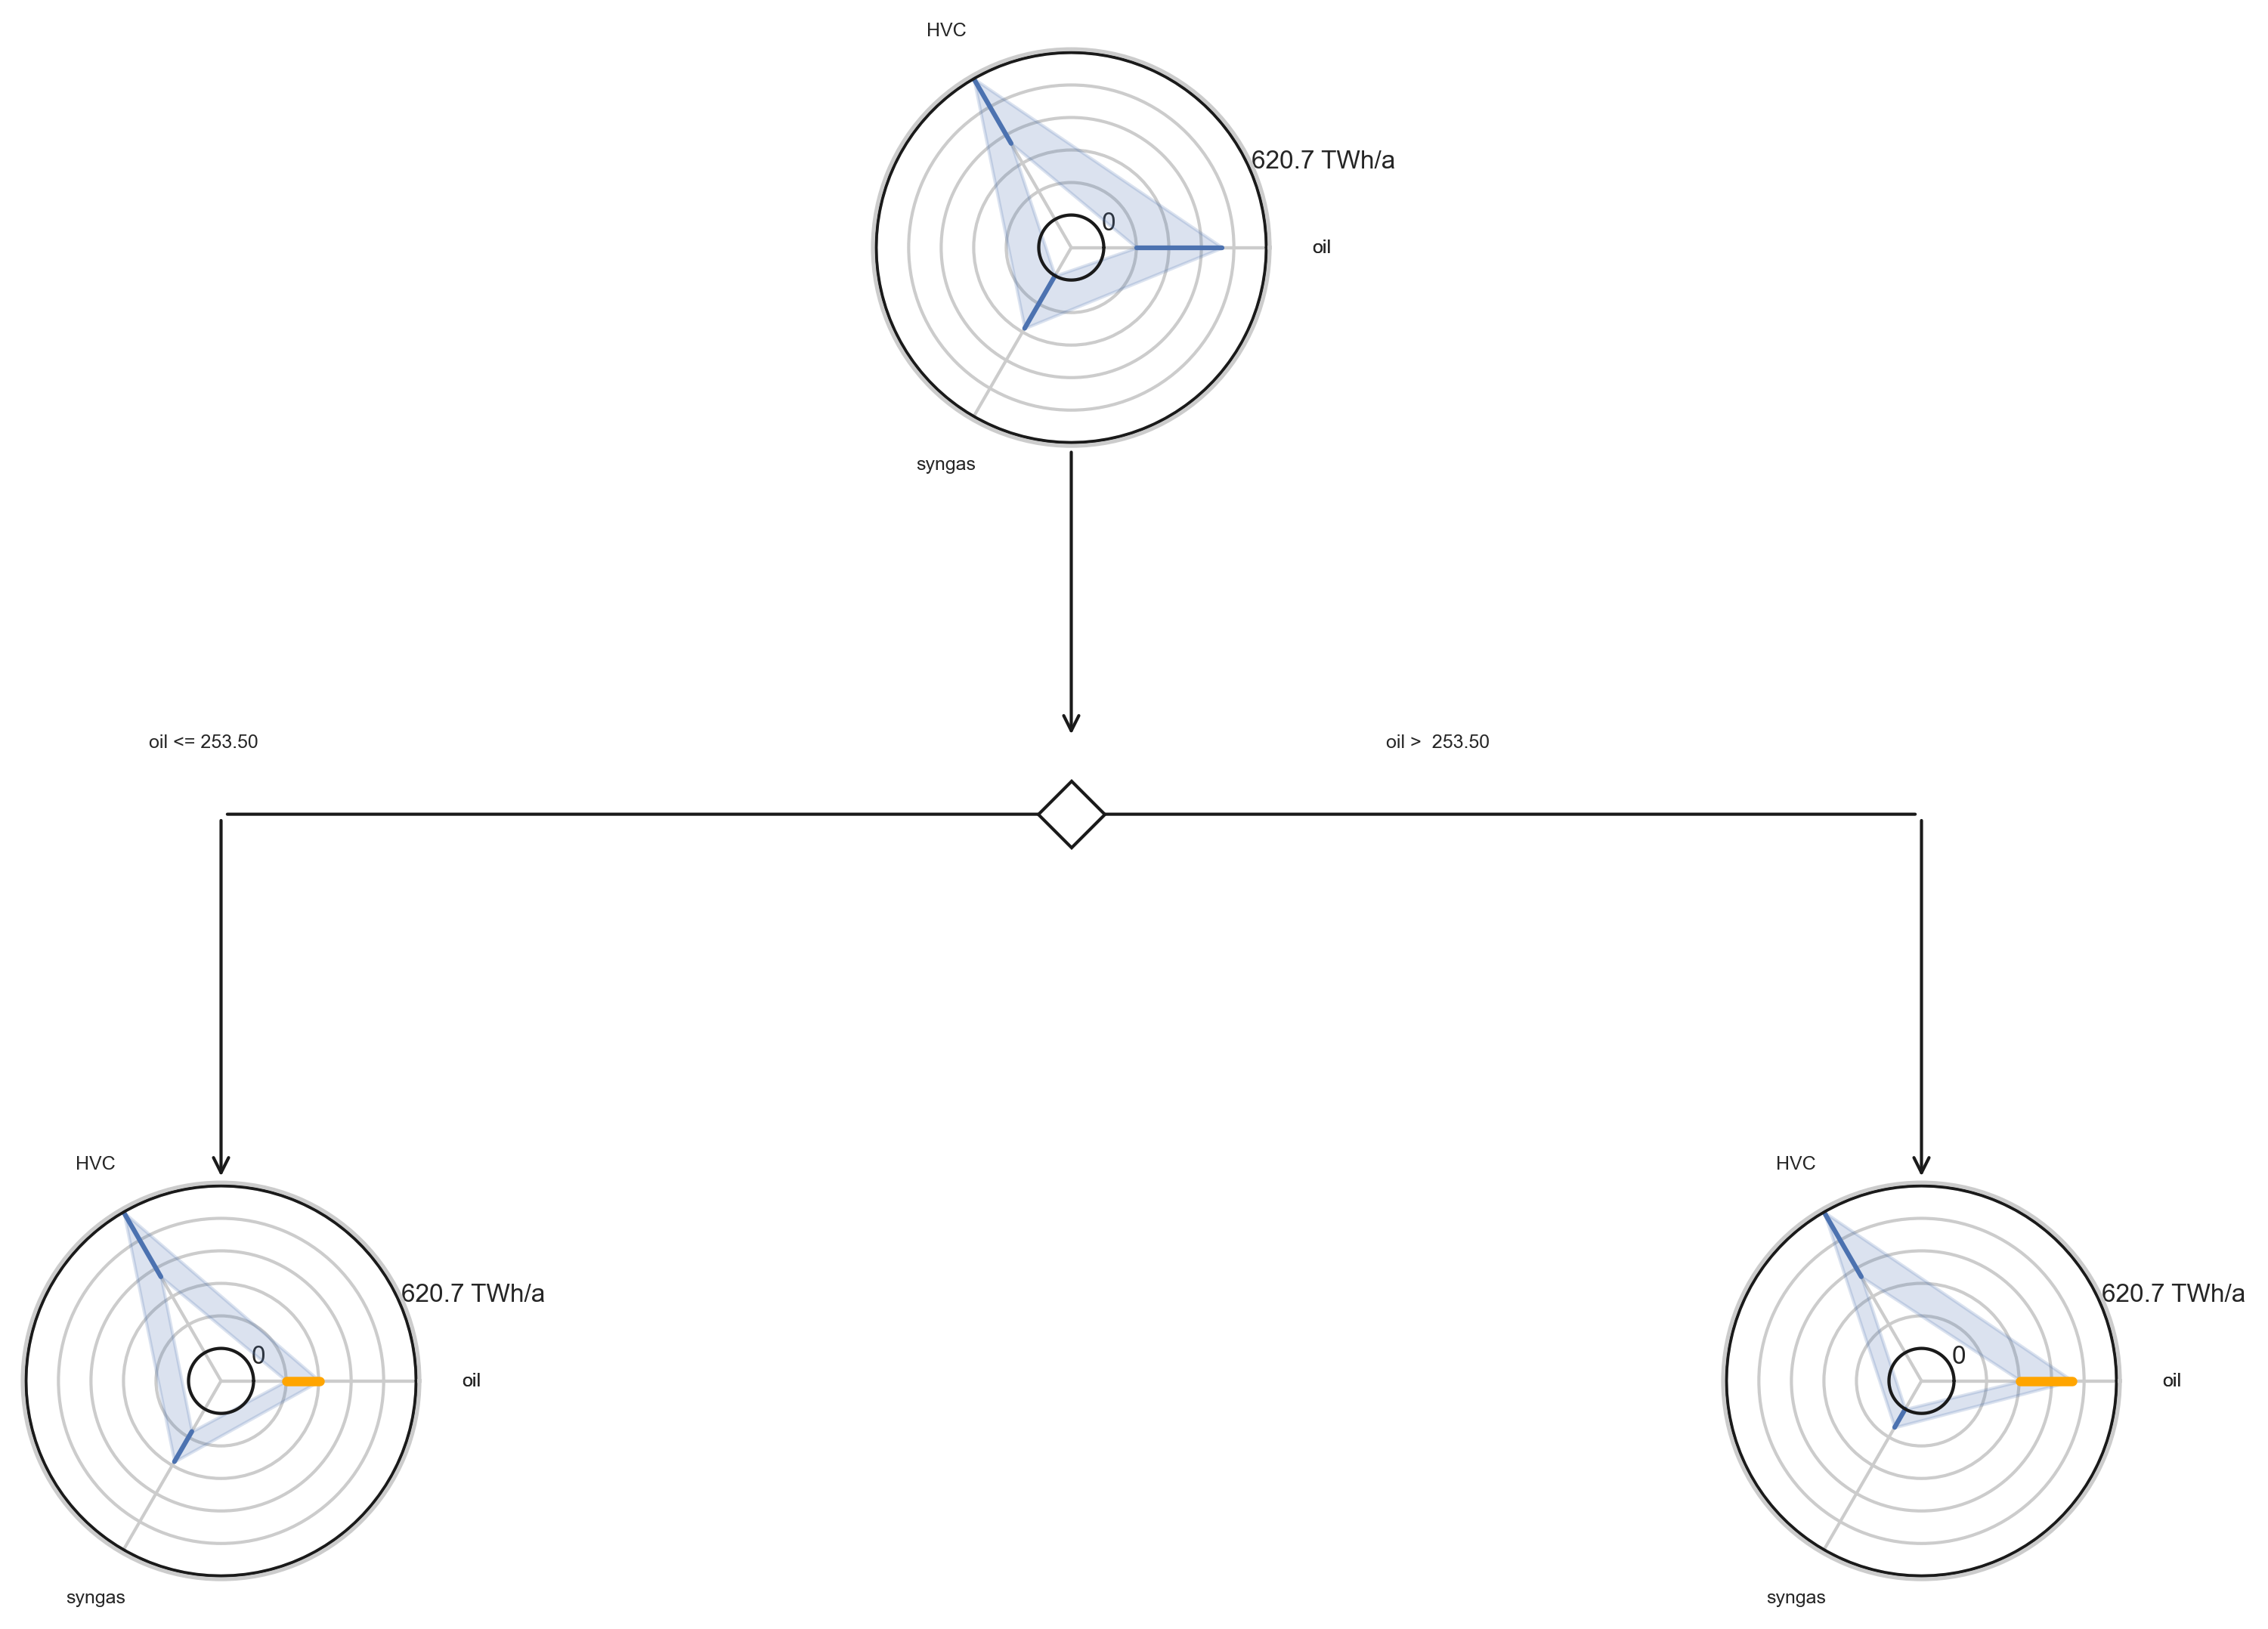

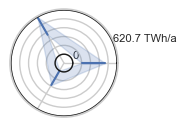

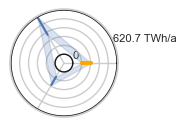

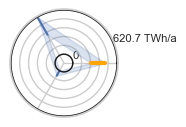

In [10]:
n_cl = 2 # Number of clusters
# short_names = ["oil", "HVC", "CHP", "LTH", "HTH", "biogas", "syngas", "coal"]
short_names = ["oil", "HVC", "syngas"]


# Read the CSV file
folder = "./biomass_results/"
df_input = pd.read_csv(folder+"df_input_normalized.csv",sep=";")
df_input = df_input.set_index("Unnamed: 0")
# Produce the interpretable tree
df_input_with_final_cluster, nodes, choices, decision_space = produce_interpretable_tree(df_input, short_names,n_cl, plot_all_spyders=True, figure_folder=folder, absolute_values=True, colors=['orange', 'green', 'yellow'])

# df_input_with_final_cluster.to_csv(folder+"df_input_with_final_cluster.csv", sep = ";")

choices[0]
print(choices)


+---------------+---------------+---------------+
| Column Name   |     Max Value |     Min Value |
+===============+===============+===============+
| crudeOil      | 452.729       | 125.54        |
+---------------+---------------+---------------+
| HVC           | 620.719       | 334.873       |
+---------------+---------------+---------------+
| CHP           |   0.472094    |   0.187881    |
+---------------+---------------+---------------+
| LTH           |   0.124349    |   0.0458156   |
+---------------+---------------+---------------+
| MTH           |   0.0093208   |   0.000661133 |
+---------------+---------------+---------------+
| HTH           |   0.189756    |   0.0717359   |
+---------------+---------------+---------------+
| DH            |   0.0515053   |   0.0188551   |
+---------------+---------------+---------------+
| SpaceHeating  |   0.000821967 |   0.000174013 |
+---------------+---------------+---------------+
| rawBiogas     |   0.314424    |   0.093915    |


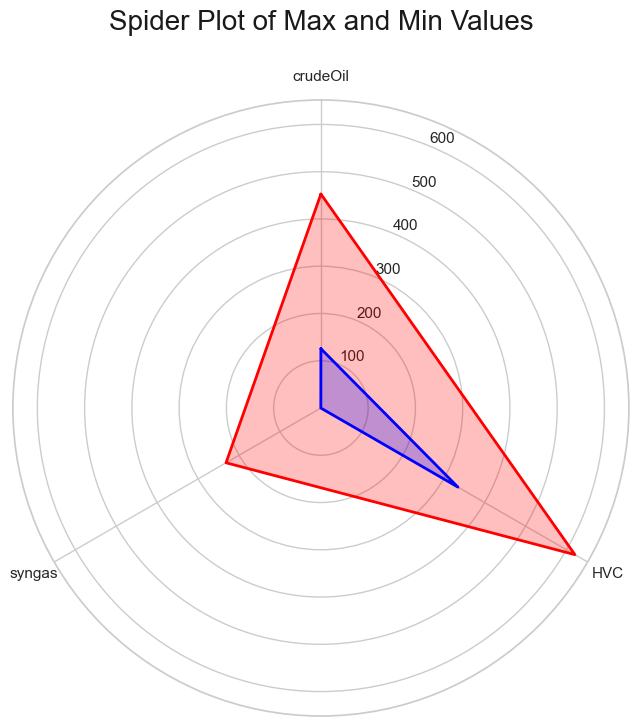

In [11]:
from tabulate import tabulate

df = pd.read_csv("outputsOfInterest300.csv", sep=",") # Read the CSV file
df = df.drop(columns=['iteration']) # Drop the iteration column
df= df.abs() # Take the absolute value of all columns

# Calculate the max and min values for each column
data_max = df.max().values
data_min = df.min().values

# Create a list of lists with column name, max value, and min value
table_data = []
for column in df.columns:
    max_value = df[column].max()
    min_value = df[column].min()
    table_data.append([column, max_value, min_value])

# Print the table
print(tabulate(table_data, headers=["Column Name", "Max Value", "Min Value"], tablefmt="grid"))


# remove column with too low vlaues 
df = df.drop(columns=['CHP', 'LTH', 'MTH' , 'HTH', 'DH', 'SpaceHeating', 'rawBiogas', 'coal'])

# Calculate the max and min values for each column
data_max = df.max().values
data_min = df.min().values

# Number of variables
num_vars = len(df.columns)

# Compute angle of each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Complete the loop

# Initialize the radar chart
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Draw one axe per variable + add labels
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
plt.xticks(angles[:-1], df.columns)

# Plot data
values_max = data_max.tolist()
values_max += values_max[:1]
ax.plot(angles, values_max, color='red', linewidth=2, linestyle='solid', label='Max')

values_min = data_min.tolist()
values_min += values_min[:1]
ax.plot(angles, values_min, color='blue', linewidth=2, linestyle='solid', label='Min')

# Fill area
ax.fill(angles, values_max, color='red', alpha=0.25)
ax.fill(angles, values_min, color='blue', alpha=0.25)

# Add a title
plt.title('Spider Plot of Max and Min Values', size=20, color='k', y=1.1)

# Show the plot
plt.show()


In [12]:
choices

{0: [' oil <= 253.50', ' oil >  253.50']}

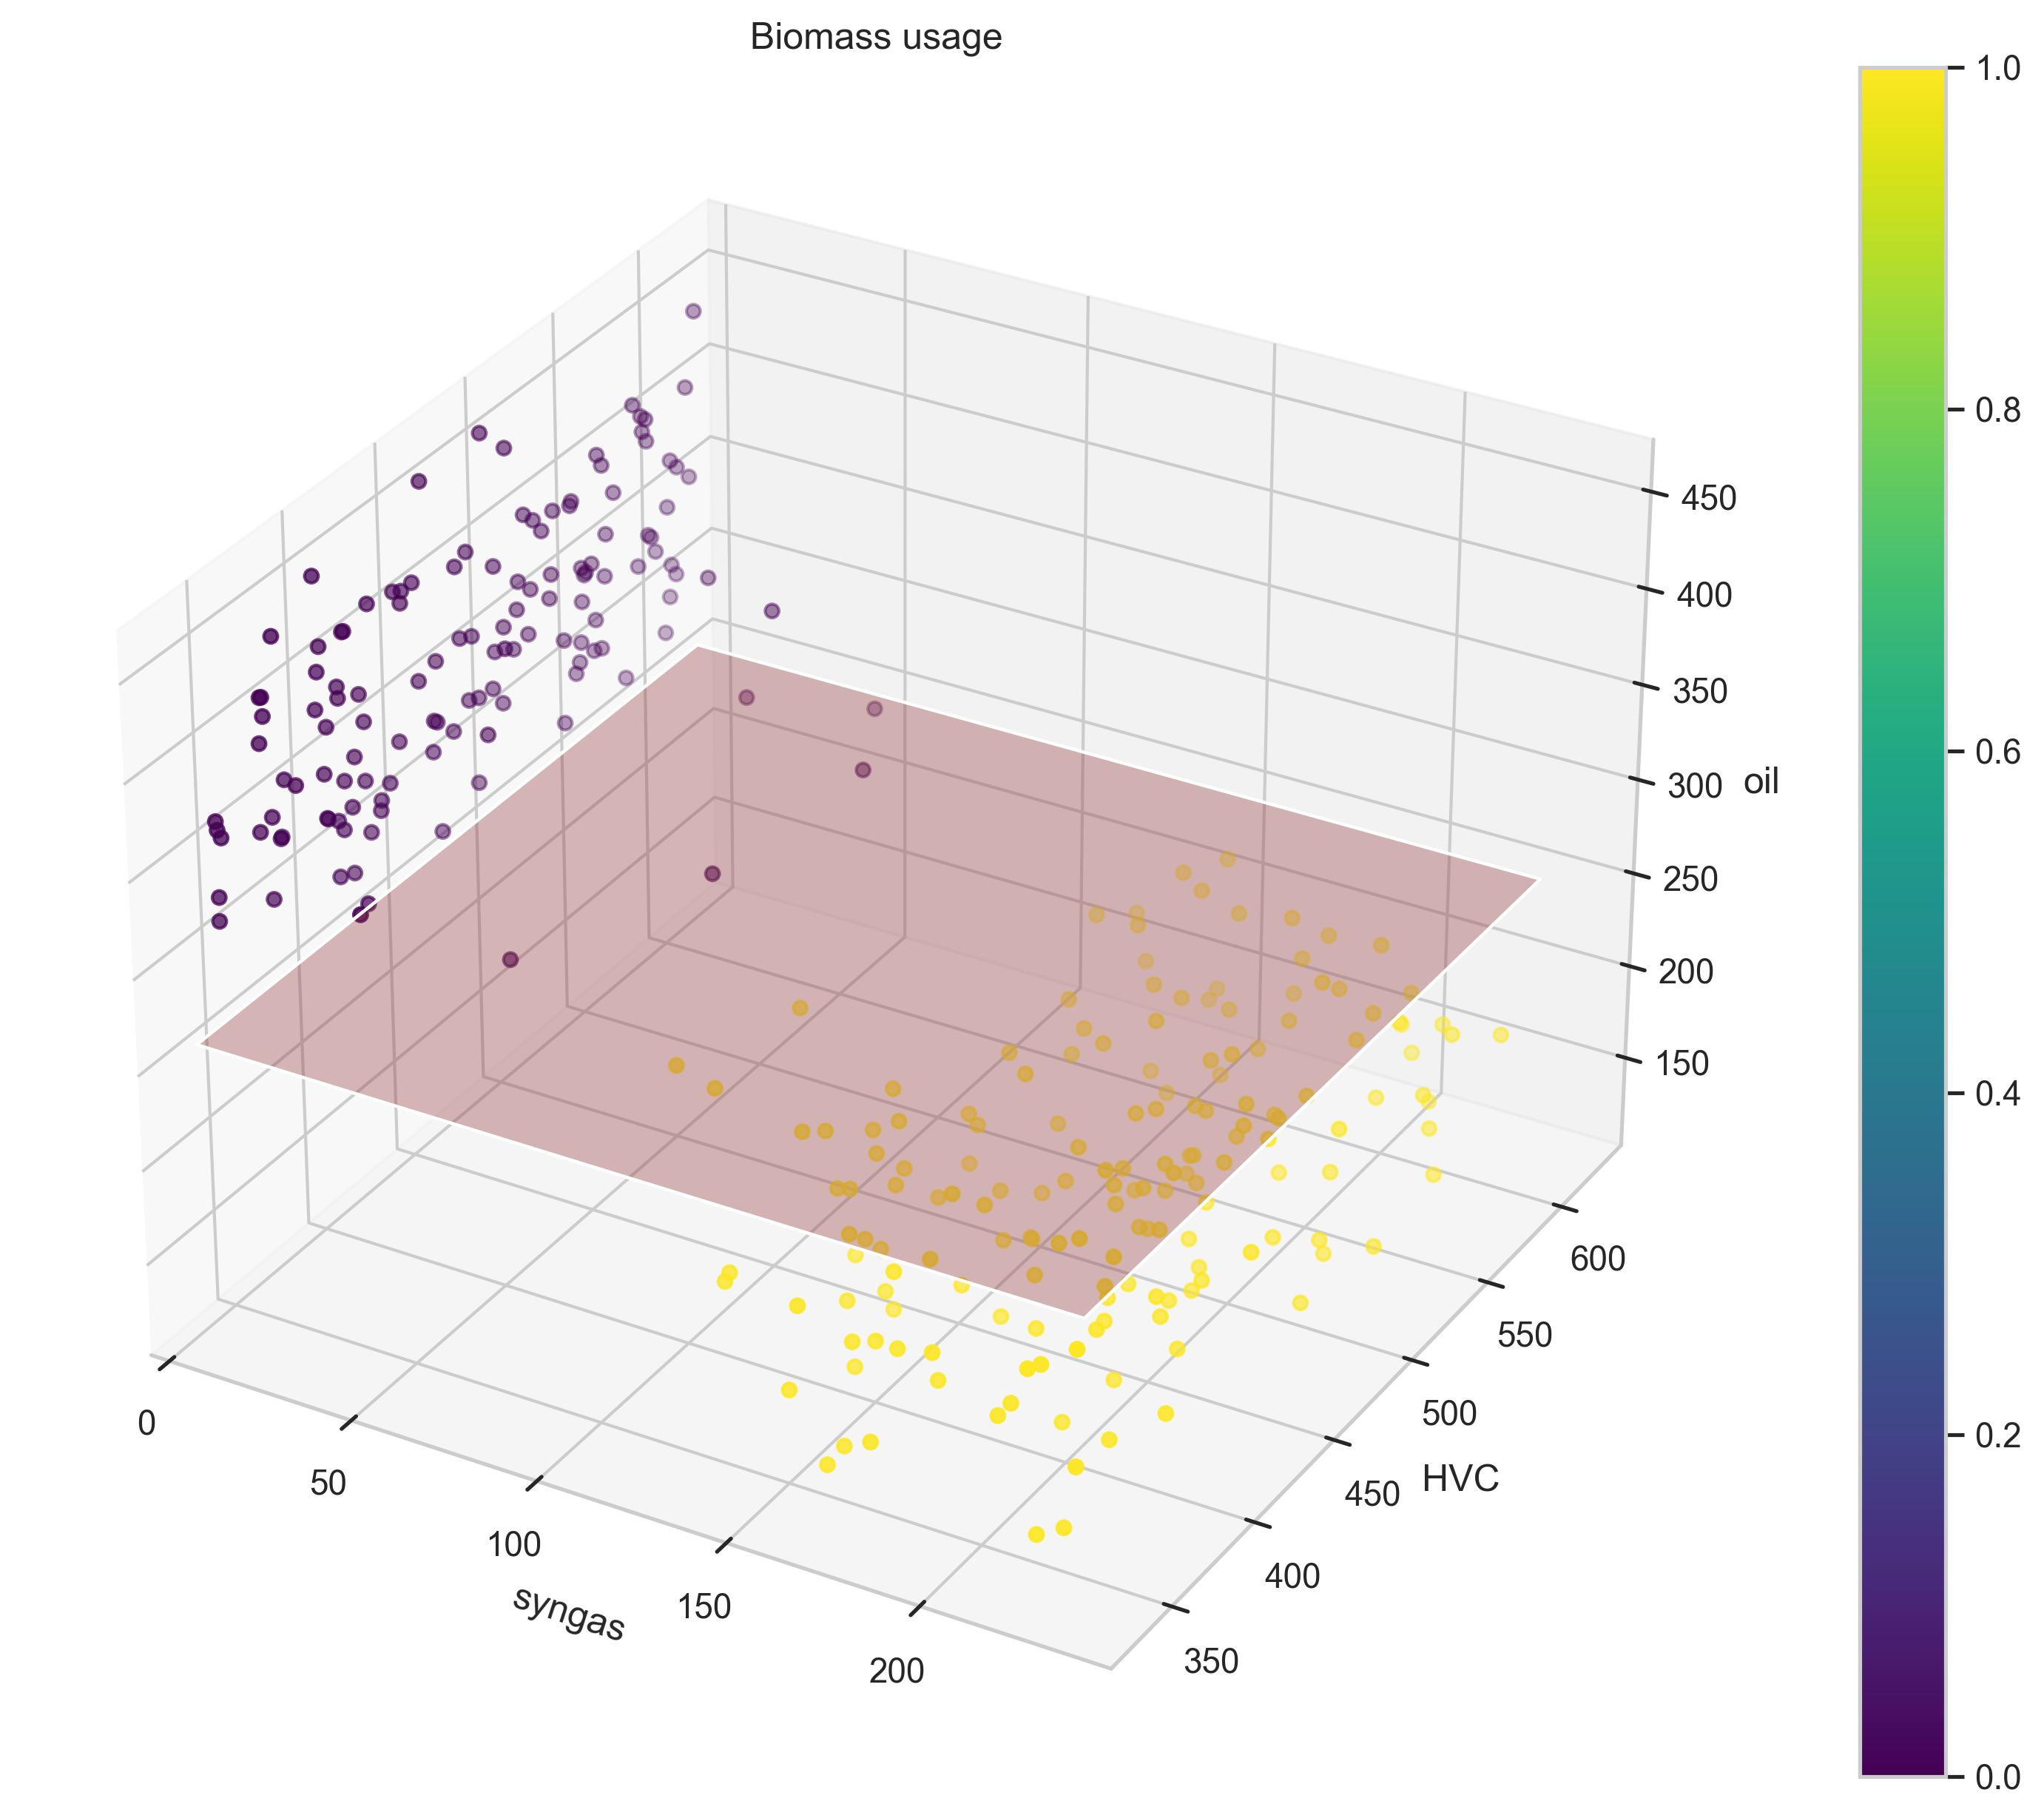

In [18]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Create a 3D scatter plot
fig = plt.figure(figsize=(15, 10), dpi=300)
ax = fig.add_subplot(111, projection='3d')

# Plot the dots
sc = ax.scatter(df_input_with_final_cluster['syngas'], df_input_with_final_cluster['HVC'], df_input_with_final_cluster['crudeOil'], c=df_input_with_final_cluster['cluster_final'], cmap='viridis')

# Function to plot a plane
def plot_x_plane(ax, x_value, color='r', alpha=0.5):
    yy, zz = np.meshgrid(
        np.linspace(df_input_with_final_cluster['HVC'].min(), df_input_with_final_cluster['HVC'].max(), 10),
        np.linspace(df_input_with_final_cluster['crudeOil'].min(), df_input_with_final_cluster['crudeOil'].max(), 10)
    )
    xx = np.full(yy.shape, x_value)
    ax.plot_surface(xx, yy, zz, color=color, alpha=alpha, rstride=100, cstride=100)

def plot_y_plane(ax, y_value, color='r', alpha=0.5):
    xx, zz = np.meshgrid(
        # np.linspace(90, df_input_with_final_cluster['syngas'].max(), 10),
        np.linspace(df_input_with_final_cluster['syngas'].min(), df_input_with_final_cluster['syngas'].max(), 10),
        # np.linspace(df_input_with_final_cluster['crudeOil'].min(), 255, 10)
        np.linspace(253.5, df_input_with_final_cluster['crudeOil'].max(), 10)
        # np.linspace(df_input_with_final_cluster['crudeOil'].min(), df_input_with_final_cluster['crudeOil'].max(), 10)
    )
    yy = np.full(xx.shape, y_value)
    ax.plot_surface(xx, yy, zz, color=color, alpha=alpha, rstride=100, cstride=100)

def plot_z_plane(ax, z_value, color='r', alpha=0.5):
    xx, yy = np.meshgrid(
        np.linspace(df_input_with_final_cluster['syngas'].min(), df_input_with_final_cluster['syngas'].max(), 10),
        np.linspace(df_input_with_final_cluster['HVC'].min(), df_input_with_final_cluster['HVC'].max(), 10)
    )
    zz = np.full(xx.shape, z_value)
    ax.plot_surface(xx, yy, zz, color=color, alpha=alpha, rstride=100, cstride=100)

# Plot the planes
for cluster, choice in choices.items():
    for condition in choice:
        column, operator, value = condition.split()
        if column == "syngas":
            plot_x_plane(ax, x_value=float(value), color='r', alpha=0.2)
        elif column == 'HVC':
            plot_y_plane(ax, y_value=float(value), color='r', alpha=0.2)
        elif column == 'oil':
            plot_z_plane(ax, z_value=float(value), color='r', alpha=0.2)
            
# plot_plane(ax, 300, color='r', alpha=0.5)

# Set labels and title
ax.set_xlabel('syngas')
ax.set_ylabel('HVC')
ax.set_zlabel('oil')
ax.set_title('Biomass usage')
ax.set_xlim(0)

# Add a colorbar
plt.colorbar(sc)

plt.savefig("biomass_results/"+ "3D-tree" + ".svg",  format="svg")
plt.savefig("biomass_results/"+ "3D-tree" + ".pdf")

# Show the plot
plt.show()




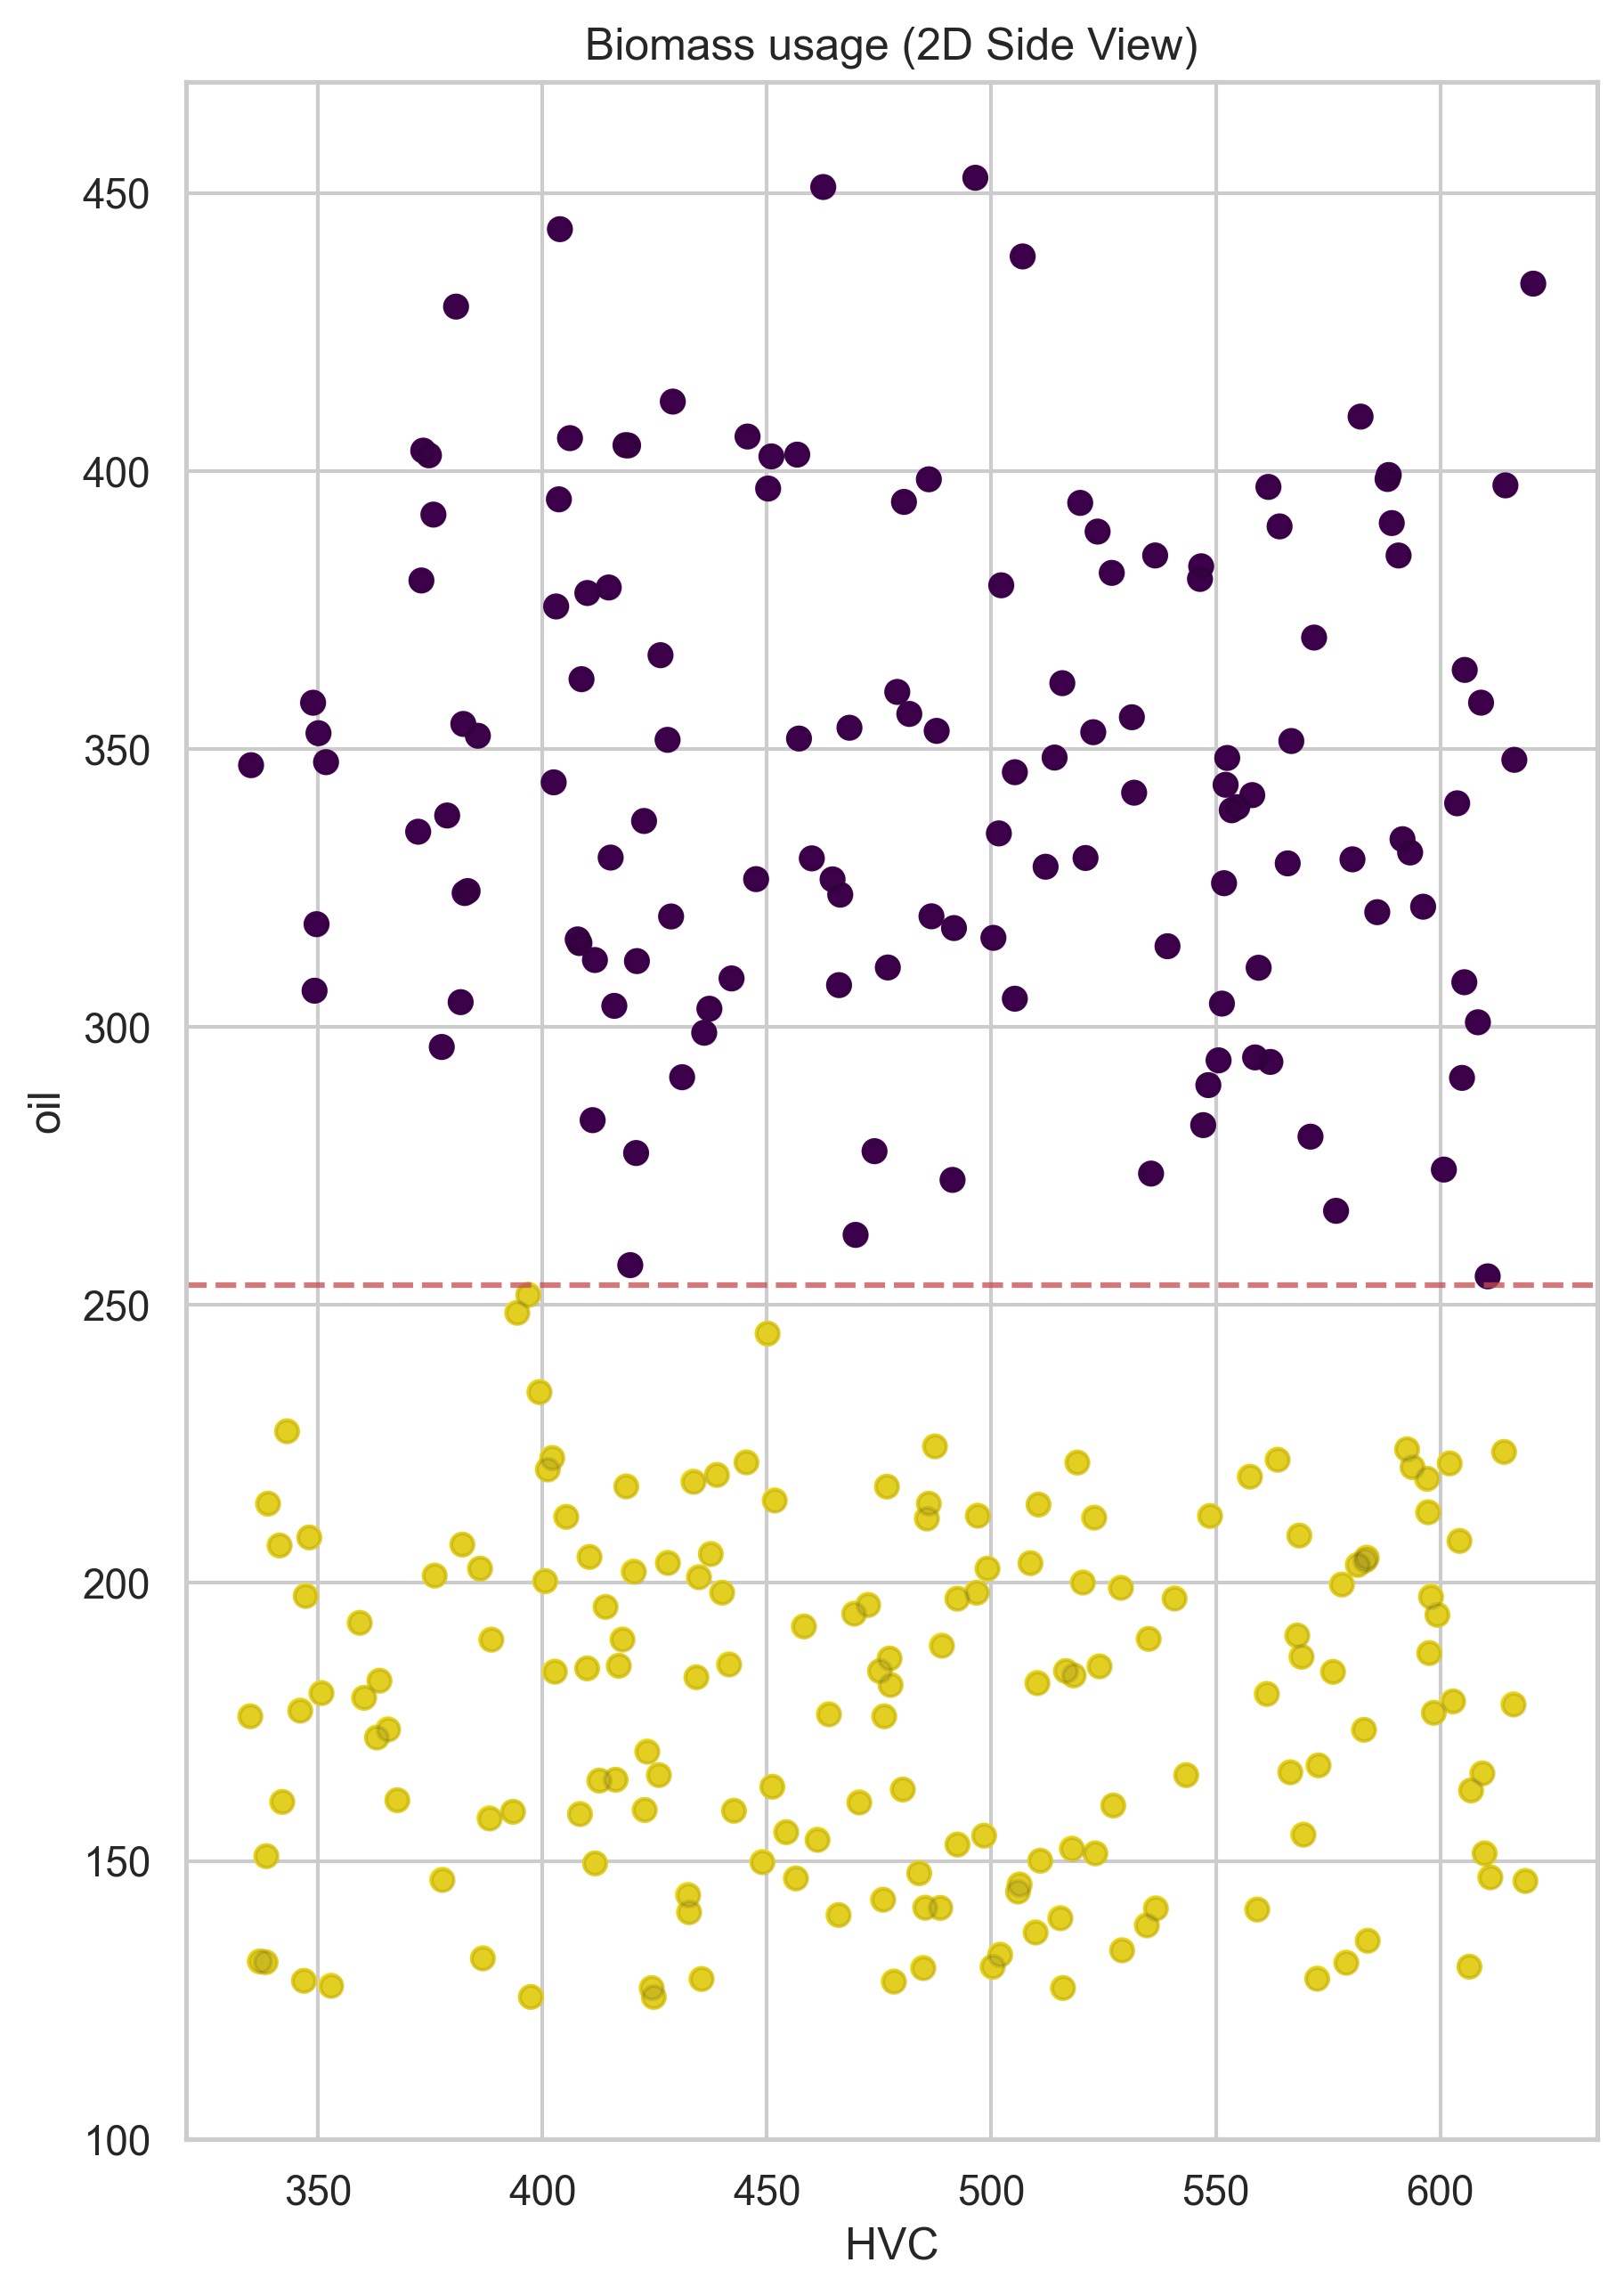

In [24]:

fig = plt.figure(figsize=(15, 10), dpi=300)
# Create a 2D side view plot
ax2 = fig.add_subplot(122)

# Plot the side view (2D)
sc2 = ax2.scatter(df_input_with_final_cluster['HVC'], df_input_with_final_cluster['crudeOil'], c=df_input_with_final_cluster['cluster_final'], cmap='viridis')
sc2 = ax2.scatter(df_input['HVC'], df_input['crudeOil'], c='black', alpha=0.1)

# Plot the planes on the 2D side view
for cluster, choice in choices.items():
    for condition in choice:
        column, operator, value = condition.split()
        value = float(value)
        if column == 'HVC':
            # ax2.axvline(x=value, color='r', linestyle='--', alpha=0.5)
            y_min, y_max =  255, 470  # range of y values
            ax2.plot([value, value], [y_min, y_max], color='r', linestyle='--', alpha=0.5)

        elif column == 'oil':
            ax2.axhline(y=value, color='r', linestyle='--', alpha=0.5)


# Set labels and title for the 2D plot
ax2.set_xlabel('HVC')
ax2.set_ylabel('oil')
ax2.set_title('Biomass usage (2D Side View)')
ax2.set_ylim(100, 470)

plt.savefig("biomass_results/"+ "2D-tree-hvc-oil" + ".svg",  format="svg")
plt.savefig("biomass_results/"+ "2D-tree-hvc-oil" + ".pdf")

# Show the plots
plt.show()

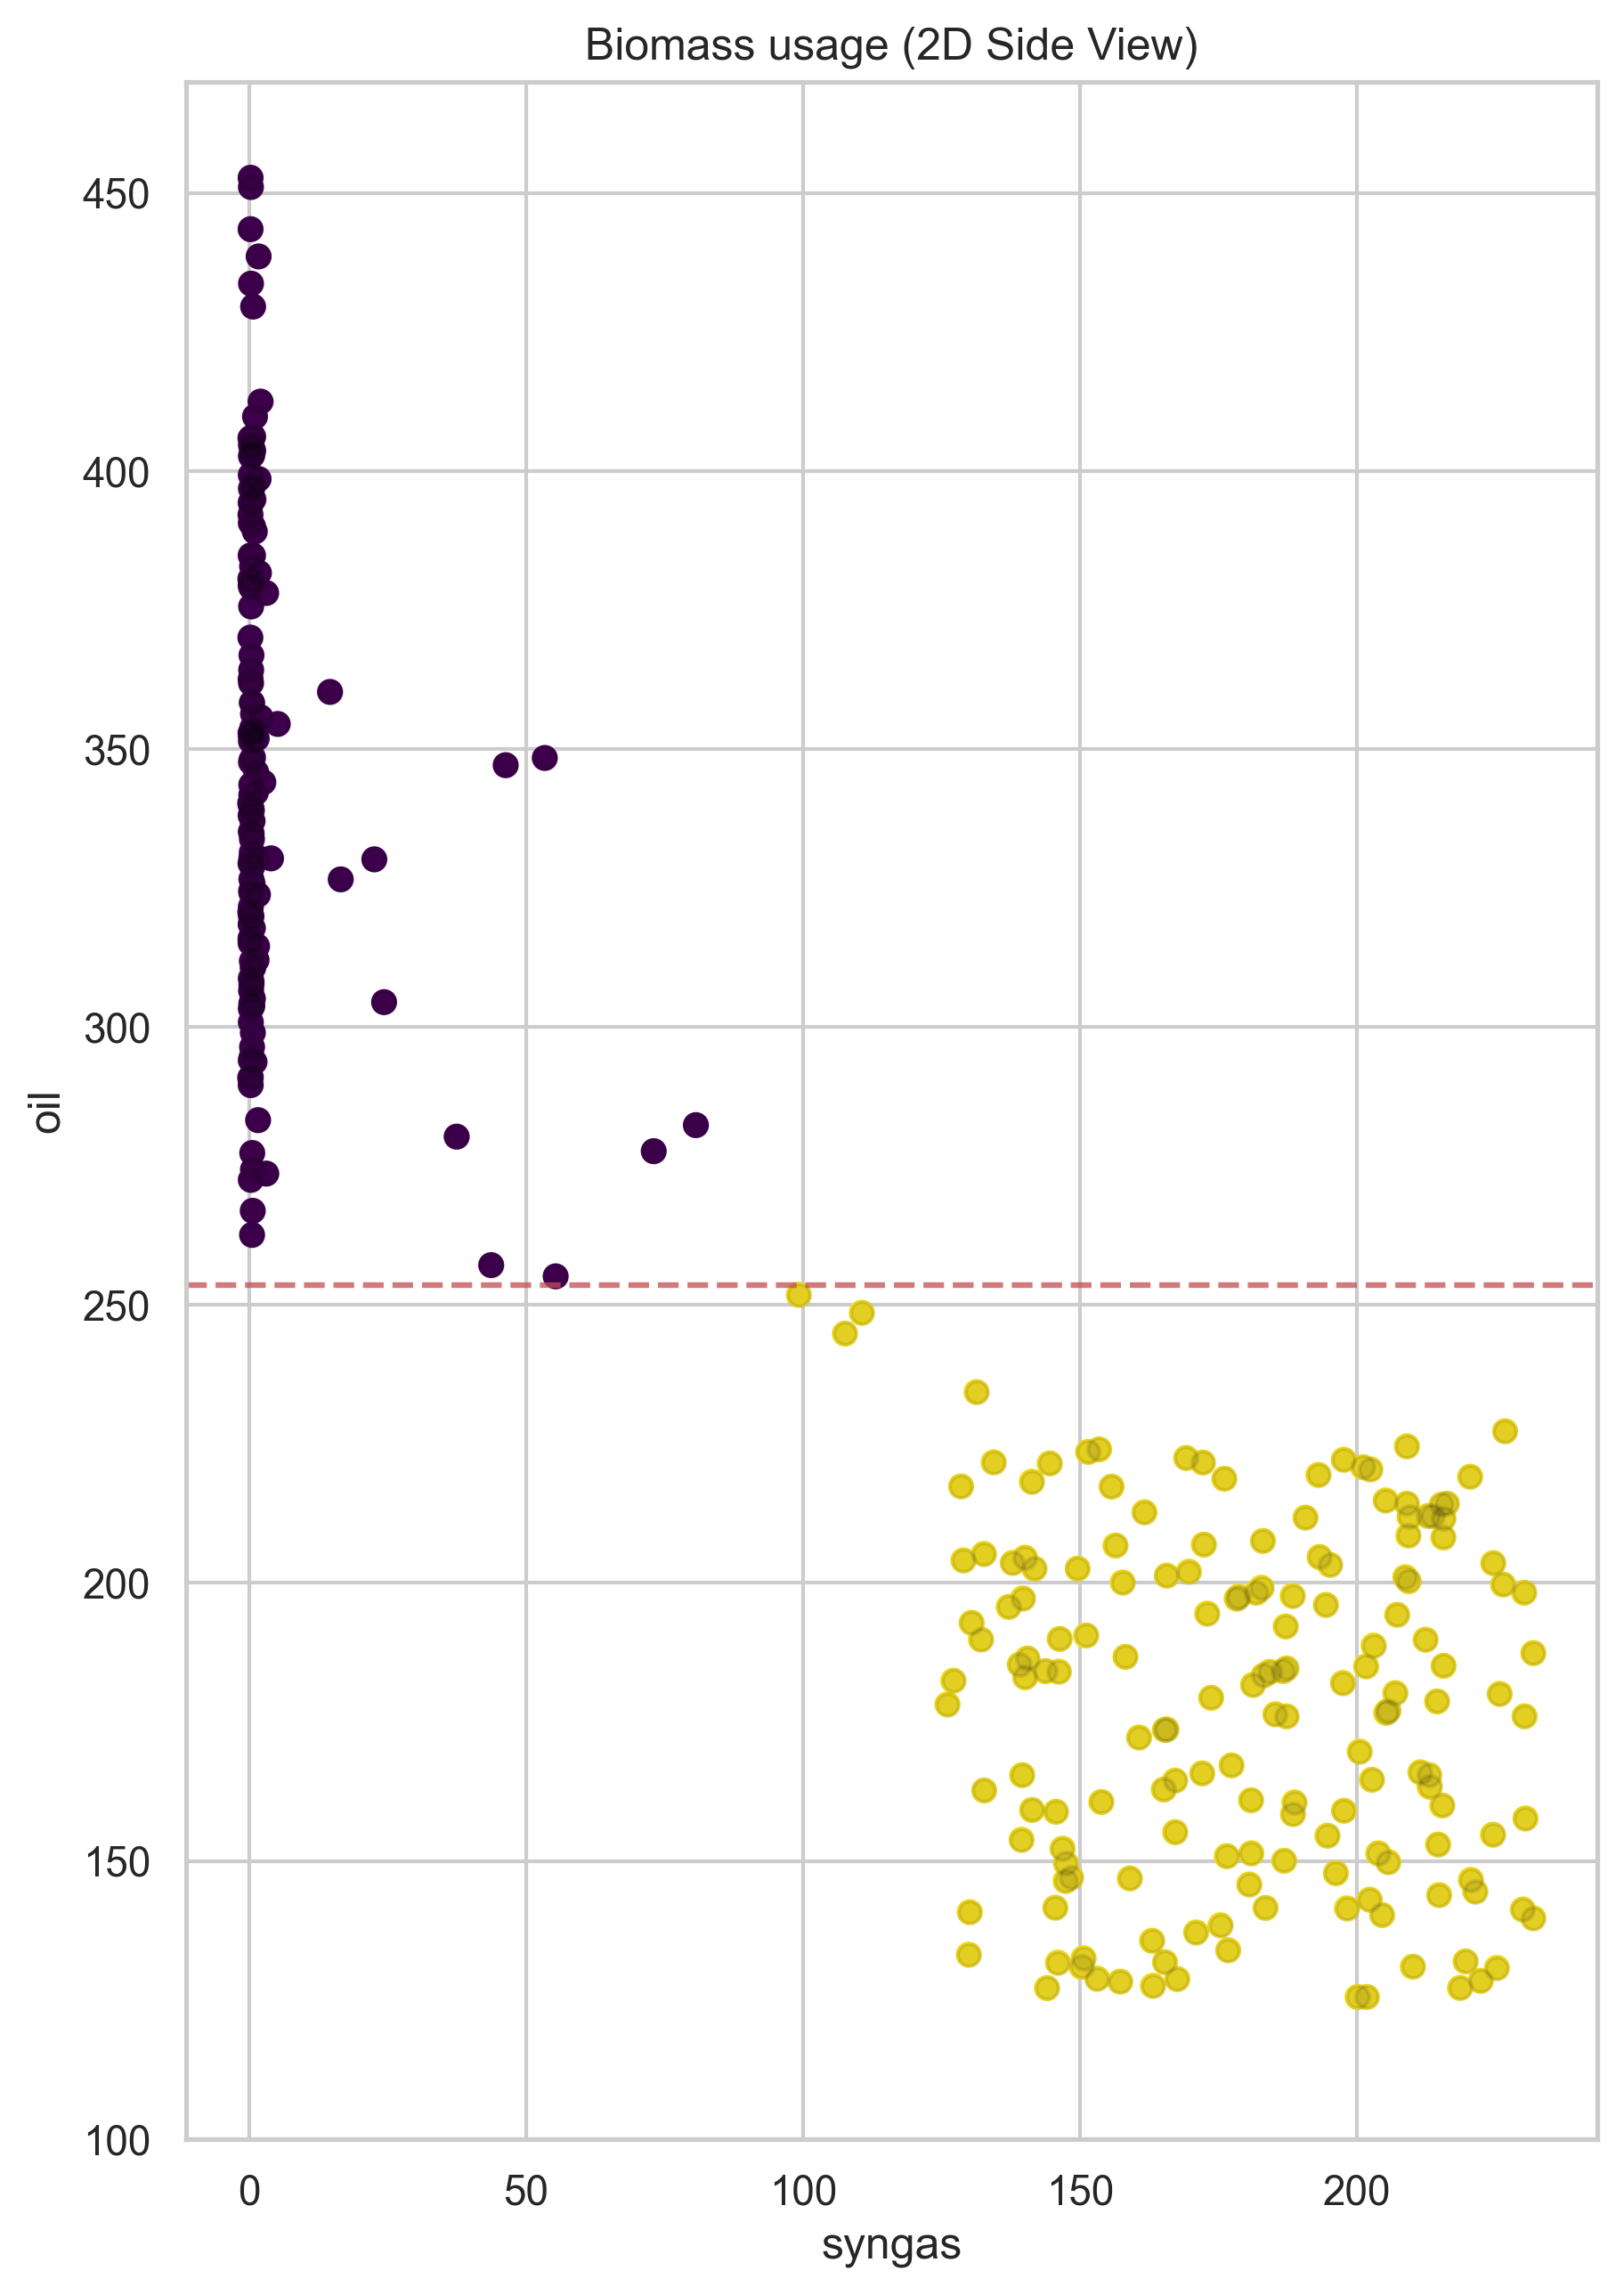

In [23]:

fig = plt.figure(figsize=(15, 10), dpi=300)
# Create a 2D side view plot
ax2 = fig.add_subplot(122)

# Plot the side view (2D)
sc2 = ax2.scatter(df_input_with_final_cluster['syngas'], df_input_with_final_cluster['crudeOil'], c=df_input_with_final_cluster['cluster_final'], cmap='viridis')
sc2 = ax2.scatter(df_input['syngas'], df_input['crudeOil'], c='black', alpha=0.1)

# Plot the planes on the 2D side view
for cluster, choice in choices.items():
    for condition in choice:
        column, operator, value = condition.split()
        value = float(value)
        if column == 'syngas':
            ax2.axvline(x=value, color='r', linestyle='--', alpha=0.5)
        elif column == 'oil':
            ax2.axhline(y=value, color='r', linestyle='--', alpha=0.5)


# Set labels and title for the 2D plot
ax2.set_xlabel('syngas')
ax2.set_ylabel('oil')
ax2.set_title('Biomass usage (2D Side View)')
ax2.set_ylim(100, 470)


plt.savefig("biomass_results/"+ "2D-tree-syngas-oil" + ".svg",  format="svg")
plt.savefig("biomass_results/"+ "2D-tree-syngas-oil" + ".pdf")

# Show the plots
plt.show()